## Contents:
1. Business Context.     
2. Dataset Description.        
3. Business Questions.     
4. Loading libraries.        
5. Loading the Dataset.       
6. Data Exploration.      
   6.1. Split the dataset into trian and test.      
   6.2. checking the missing values.    
   6.3. Sepearating the Features and the Target Label.
   6.4. Convert target Label (M) column to binary label (0 for benign and 1 for malignant).               
7. Data Analysis By answering the Business Questions.     
   7.1. Business Question 1        
   7.2. Business Question 2                      
   7.3. Business Question 3           
   7.4. Business Question 4           
   7.5. Business Question 5  
   7.6. Business Question 6     
     7.6.1 algorithm selection and hyperparameter tuning.    
     7.6.2.Testing the selected Model.     
   7.7. Business Question 7      
8. Conclusion.                     
9. Assessment Submission form.

## 1. Business Context:

A medical research company that specializes in the detection and treatment of breast cancer is our customer. They have compiled data on the characteristics of breast cancer patients and the outcomes of their diagnoses. They want our assistance as data science consultants to comprehend the features of the information and spot any patterns or trends that can help them increase the accuracy of their diagnoses.

## 2- Dataset Description.

The dataset we are using is the Breast Cancer Wisconsin (Diagnostic) dataset, which is available on the UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)). Data from breast cancer patients who received a breast are included in this collection. Ten real-valued characteristics calculated from the patient's breast's digital picture are included, along with a binary classification label indicating whether the breast was positive or negative. was diagnosed as malignant (M) or benign (B).
The dataset contains 569 instances and has no missing values.



## 3. Business Questions

- Business Question 1: What is the distribution of malignant and benign diagnoses in the dataset?
- Business Question 2: Which feature(s) have the highest correlation with the diagnosis?
- Business Question 3: What is the standard deviation and mean of each feature for benign and malignant cases?
- Business Question 4:  What are each feature's minimum and maximum values for benign and malignant cases?
- Business Question 5: What is the distribution of the feature  for benign and malignant cases?
- Business Question 6: How well can the features be used to predict the diagnosis?
- Business Question 7: Which feature(s) is/are most critical in determining the diagnosis? 


## 4. loding libraries. 

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.model_selection
from sklearn import datasets
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import plotly.express as px
import sklearn.inspection

## 5. Loading the Dataset

In [67]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
df = pd.read_csv(url, header=None)

- when i downlaoded the dataset i found it without header row definitions so i have to add it.

In [68]:
column_names = ['ID', 'diagnosis'] + ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean',
              'compactness_mean', 'concavity_mean', 'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
              'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se',
              'concavity_se', 'concave_points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst',
              'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst',
              'concavity_worst', 'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst']
df.columns = column_names
df=df.set_index("ID")
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
ID,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## 6. Data Exploration

## 6.1. Split the dataset into trian and test
- we didn't split the data into test and train sets now becouse we have first  to check missing value.

In [69]:
df_train,df_test =sklearn.model_selection.train_test_split(df)

print("df_train size:", df_train.shape)
print("df_test size:", df_test.shape)

df_train size: (426, 31)
df_test size: (143, 31)


## 6.2. checking the missing values:

In [70]:
missing_values = pd.DataFrame(df.isnull().sum(), columns=['missing_values'])

print(missing_values)

                         missing_values
diagnosis                             0
radius_mean                           0
texture_mean                          0
perimeter_mean                        0
area_mean                             0
smoothness_mean                       0
compactness_mean                      0
concavity_mean                        0
concave_points_mean                   0
symmetry_mean                         0
fractal_dimension_mean                0
radius_se                             0
texture_se                            0
perimeter_se                          0
area_se                               0
smoothness_se                         0
compactness_se                        0
concavity_se                          0
concave_points_se                     0
symmetry_se                           0
fractal_dimension_se                  0
radius_worst                          0
texture_worst                         0
perimeter_worst                       0


## 6.3. Sepearating the Features and the Target Label

In [72]:
x= df.drop(['diagnosis'], axis=1)
y= df["diagnosis"]
x_train, x_test, y_train, y_test =sklearn.model_selection.train_test_split(x,y)

print('df:',df.shape)
print('x_train:',x_train.shape)
print('x_test:',x_test.shape)
print('y_train:',y_train.shape)
print('y_test:',y_test.shape)

df: (569, 31)
x_train: (426, 30)
x_test: (143, 30)
y_train: (426,)
y_test: (143,)


## 6.4. Convert target Label (M) column to binary label (0 for benign and 1 for malignant).

In [71]:
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

## 7- Data Analysis By answering the Business Questions.

## 7.1. Business Question 1: What is the distribution of malignant and benign diagnoses in the dataset?
we will use the value_counts() method in pandas to count the number of instances with malignant and benign diagnoses.

In [73]:
print(df['diagnosis'].value_counts())

0    357
1    212
Name: diagnosis, dtype: int64


- We can see that there are 357 instances with a benign diagnosis and 212 instances with a malignant diagnosis in the dataset.

## 7.2. Business Question 2: Which feature(s) have the highest correlation with the diagnosis?

- To determine which feature(s) have the highest correlation with the diagnosis, we will calculate the correlation coefficients between each feature and the diagnosis. The correlation coefficient ranges from -1 to 1, where a value of 1 indicates a strong positive correlation, 0 indicates no correlation, and -1 indicates a strong negative correlation.



In [74]:
correlations = df.corr()['diagnosis'].sort_values(ascending=False)[1:]
df_corr = pd.DataFrame({'feature': correlations.index, 'correlation': correlations})
df_corr.head()

,feature,correlation
concave_points_worst,concave_points_worst,0.793566
perimeter_worst,perimeter_worst,0.782914
concave_points_mean,concave_points_mean,0.776614
radius_worst,radius_worst,0.776454
perimeter_mean,perimeter_mean,0.742636


- we can see that the concave points, perimeter, radius, and area features have the highest positive correlation with the diagnosis, with correlation coefficients of 0.776614, 0.742636, 0.730029, and 0.708984, respectively. This suggests that these features may be strong predictors of the diagnosis of breast cancer.

## 7.3. Business Question 3: What is the standard deviation and mean of each feature for benign and malignant cases?

we will use the groupby method in Pandas to group the data by the diagnosis (benign or malignant) and then calculate the mean and standard deviation for each feature within each group.

In [76]:
grouped = df.groupby('diagnosis').agg(['mean', 'std'])
mean_std_df = pd.DataFrame(grouped.to_records())
mean_std_df.columns = [col.replace("('", "").replace("', ", "_").replace(")", "") for col in mean_std_df.columns]
print(mean_std_df)

   diagnosis  radius_mean_'mean'  radius_mean_'std'  texture_mean_'mean'  \
0          0           12.146524           1.780512            17.914762   
1          1           17.462830           3.203971            21.604906   

   texture_mean_'std'  perimeter_mean_'mean'  perimeter_mean_'std'  \
0            3.995125              78.075406             11.807438   
1            3.779470             115.365377             21.854653   

   area_mean_'mean'  area_mean_'std'  smoothness_mean_'mean'  ...  \
0        462.790196       134.287118                0.092478  ...   
1        978.376415       367.937978                0.102898  ...   

   compactness_worst_'mean'  compactness_worst_'std'  concavity_worst_'mean'  \
0                  0.182673                 0.092180                0.166238   
1                  0.374824                 0.170372                0.450606   

   concavity_worst_'std'  concave_points_worst_'mean'  \
0               0.140368                     0.074444 

## 7.4. Business Question 4: What are each feature's minimum and maximum values for benign and malignant cases?

- we will use the groupby method in pandas to group the data by diagnosis and then calculate the minimum and maximum values for each feature using the min and max functions.

In [77]:
min_max_df = df.groupby('diagnosis').agg(['min', 'max'])

min_max_df.head()


radius_mean        texture_mean        perimeter_mean         \
                  min    max          min    max            min    max   
diagnosis                                                                
0               6.981  17.85         9.71  33.81          43.79  114.6   
1              10.950  28.11        10.38  39.28          71.90  188.5   

          area_mean         smoothness_mean          ... compactness_worst  \
                min     max             min     max  ...               min   
diagnosis                                            ...                     
0             143.5   992.1         0.05263  0.1634  ...           0.02729   
1             361.6  2501.0         0.07371  0.1447  ...           0.05131   

                  concavity_worst        concave_points_worst         \
              max             min    max                  min    max   
diagnosis                                                              
0          0.5849         0.00000  1.252              0.00000  0.175   
1          1.0580         0.02398  1.170              0.02899  0.291   

          symmetry_worst         fractal_dimension_worst          
                     min     max                     min     max  
diagnosis                                                         
0                 0.1566  0.4228                 0.05521  0.1486  
1                 0.1565  0.6638                 0.05504  0.2075  

[2 rows x 60 columns]

## 7.5. Business Question 5: What is the distribution of the feature for benign and malignant cases?

- We will use the Seaborn library to create the histograms To visualize the distribution of each feature for benign and malignant cases.

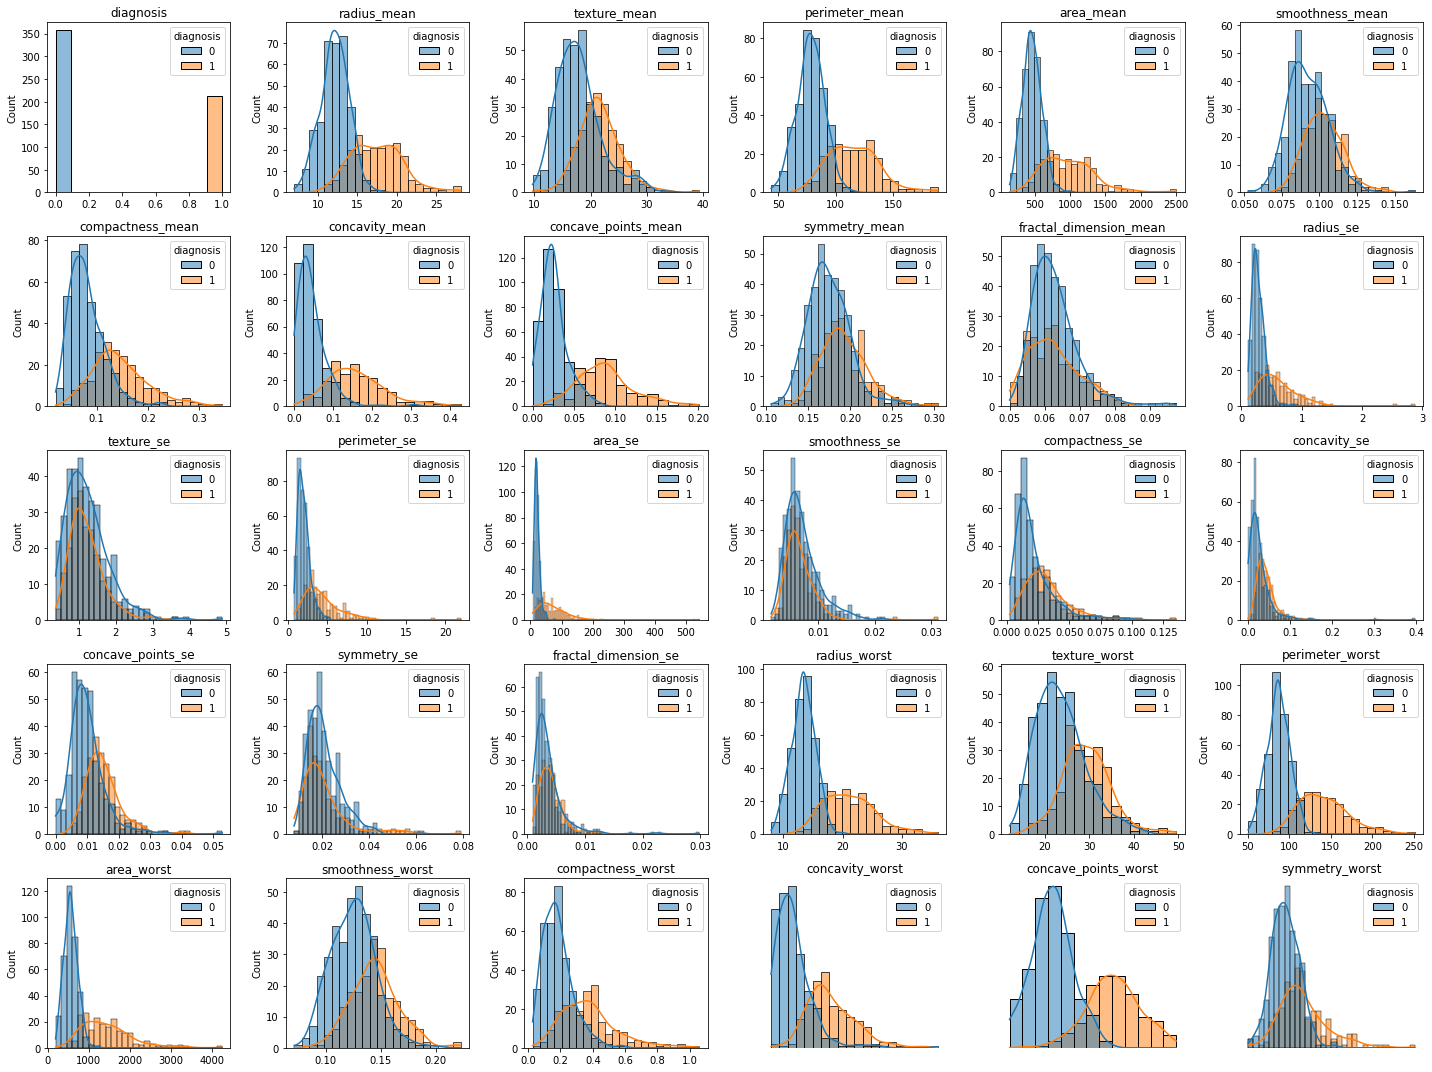

In [78]:
fig, axs = plt.subplots(nrows=5, ncols=6, figsize=(20, 15))
axs = axs.flatten()

for i, col in enumerate(df.columns[:-1]):
    sns.histplot(data=df, x=col, hue="diagnosis", kde=True, ax=axs[i])
    axs[i].set_title(col)
    axs[i].set_xlabel("")

axs[-1].axis("off")
axs[-2].axis("off")
axs[-3].axis("off")
plt.tight_layout()

plt.show()

## 7.6. Business Question 6: How well can the features be used to predict the diagnosis?

- we will train a machine learning model on the dataset and evaluate its performance using accuracy on the training and tstsing sats to get the accuracy of predicting the diagnosis using the features.
- we will use here the SVM model after exprimintations decision tree and  Logistic Regression model becouse it has a best performance with the hieghest accuracy rate.

## 7.6.1 algorithm selection and hyperparameter tuning. 

In [86]:
parameters_grid = {
    "kernel": ["rbf", "poly"],
    "C":[ 0.001, 0.01, 1, 10, 100]
}
model =sklearn.model_selection.GridSearchCV(sklearn.svm.SVC(),
                                              parameters_grid, scoring="accuracy", cv=5, n_jobs=-1)

model.fit(x_train, y_train)
print("accuracy of best SVM classfier = {:.2f}".format(model.best_score_))
print("Best found hyoerparameters of SVM classfier ={}".format(model.best_params_))

accuracy of best SVM classfier = 0.94
Best found hyoerparameters of SVM classfier ={'C': 100, 'kernel': 'rbf'}


- after experimented different values of C with kernel (rbf, poly) we found that best performance with best accuracy with C= 100 and kernel "rbf" the and get the best accuracy= 0.94.

## 7.6.2. Testing the selected Model

In [89]:
y_predicted = model.predict(x_test)
accuracy = sklearn.metrics.accuracy_score(y_test, y_predicted)
print("accuracy = " , accuracy)

accuracy =  0.9230769230769231


The testing accuracy of the model, which is 0.93, is also relatively close to The Training accuracy of the model, that indicating that there no underfitting or overfitting for the data.and the model have a reasonable performance to predictions. this indicated that SVM model has doing great in predicting the diagnosis of breast cancer in the given dataset.

## 7.7. Business Question 7: Which feature(s) is/are most critical in determining the diagnosis?

- we have to get the important features which caused the cancer breast to get the conclusion.

In [94]:
perm_importance = sklearn.inspection.permutation_importance(model, x_test, y_test)

top_indices = np.argsort(perm_importance.importances_mean)[::-1][:6]
top_Factors = df.columns[top_indices]

top_Factors = pd.DataFrame(top_Factors, columns=['top_Factors'])
print(top_Factors)

            top_Factors
0       perimeter_worst
1        perimeter_mean
2          perimeter_se
3         texture_worst
4        symmetry_worst
5  concave_points_worst


## 8. Conclusion:
In order to understand which characteristics are most useful for predicting the diagnosis of breast cancer, we may also examine the feature importance scores produced by the SVM model. The top five characteristics are, in decreasing order of importance:

1        perimeter_worst       
2        perimeter_mean    
3          perimeter_se    
4         texture_worst    
5        symmetry_worst     


According to these findings, the mass's size, shape, and characteristics are the most major elements for identifying malignant from benign breast masses.

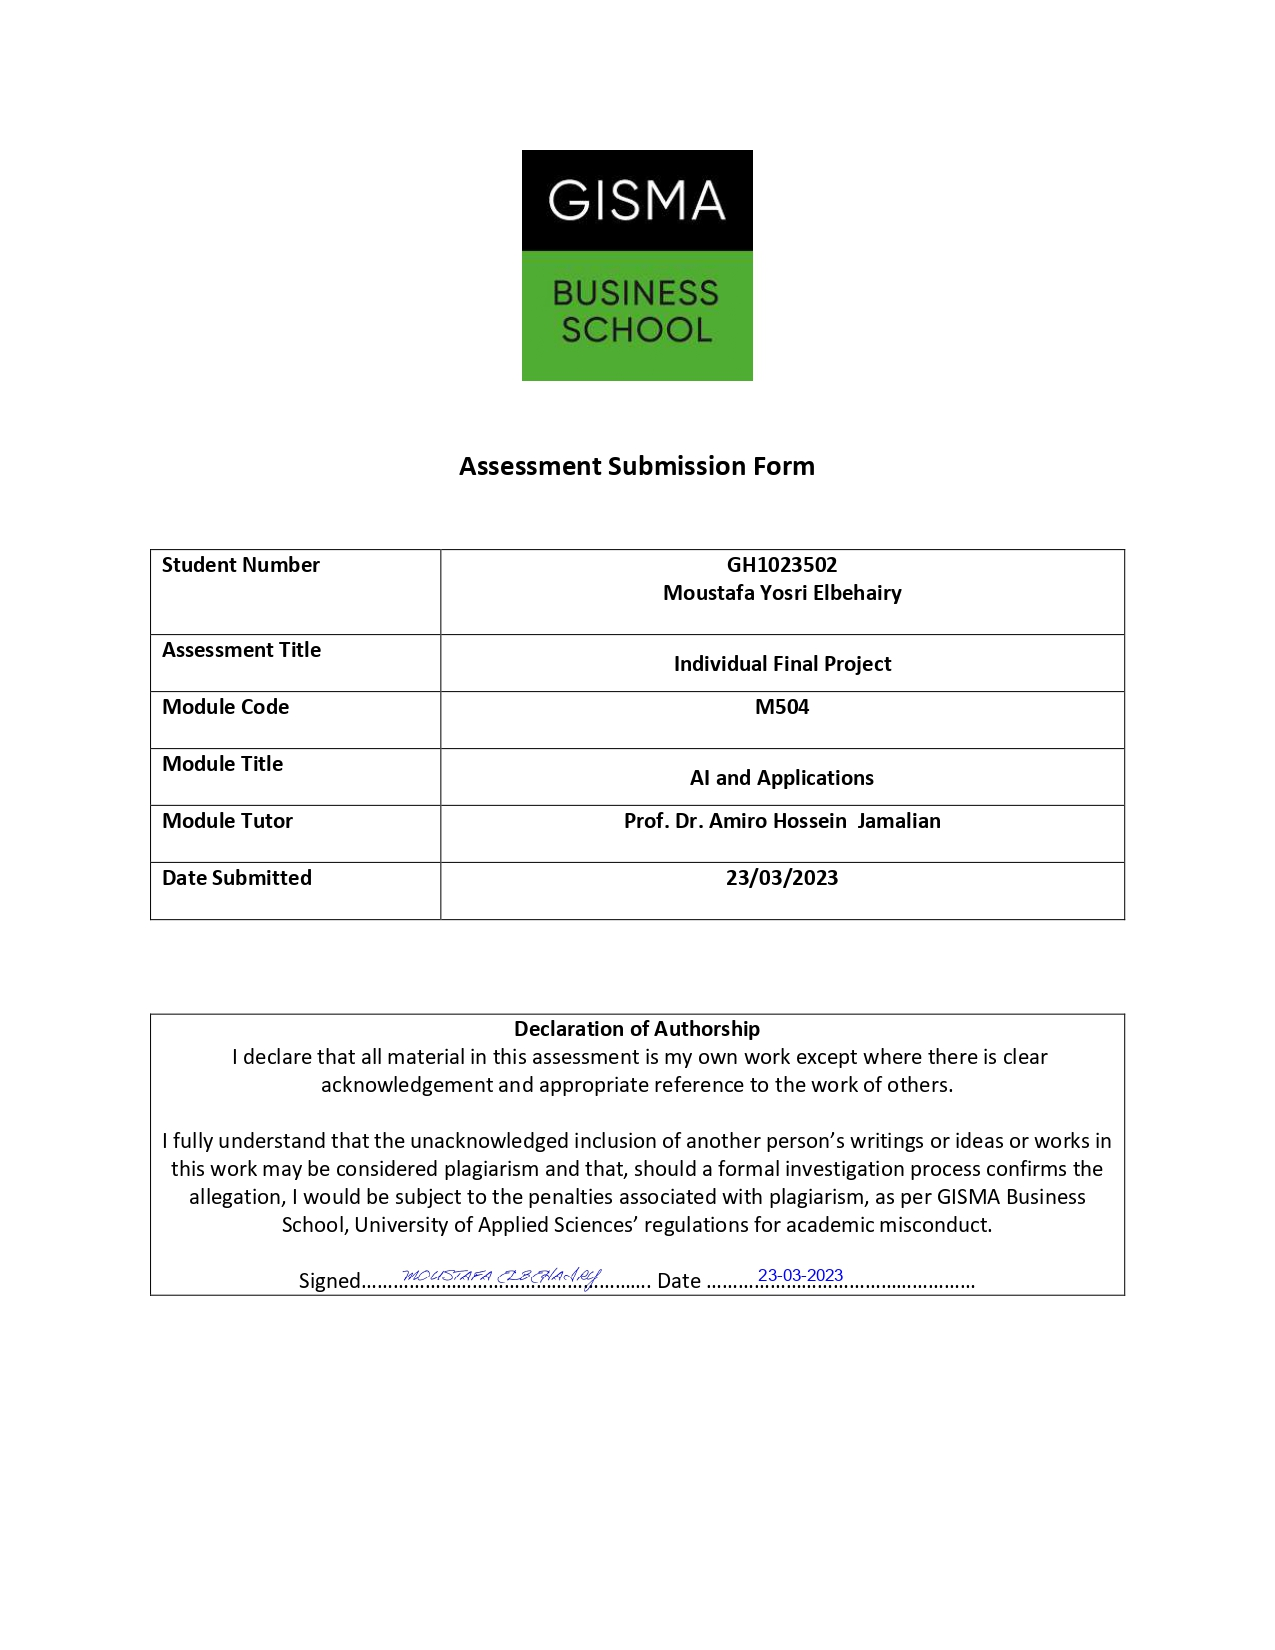